In [1]:
# Observed trend1: when latitude increases in magnitude temp decreases. 

In [2]:
# Observed trend2: when latitude increases in magnitude humidity decreases. 

In [3]:
# Observed trend2: when latitude increases in magnitude humidity decreases. 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from sklearn import preprocessing

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List and Dict for holding city, lat and lng info

In [5]:
from collections import defaultdict
lat_lng = defaultdict()
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
for x in lat_lngs:
    lat, long = x # tuple unpacking
    city = citipy.nearest_city(lat, long).city_name
    if city not in cities:
        cities.append(city)
        #print(city)
        lat_lng[city] = (lat, long)
        #print(lat, long)
len(cities)

616

In [6]:
len(lat_lng)

616

# creating the datafrom from the above list and dict

In [7]:
df= pd.DataFrame({'lat_lng':lat_lng})
df.index.names = ['City']
df.reset_index(inplace=True)
df.head(5) 
# these codes converts the dict into a dataframe and reset the index. 

,City,lat_lng
0,abnub,"(27.35668571396387, 30.642843460480435)"
1,abonnema,"(1.609647735079605, 5.530803896665759)"
2,acahay,"(-25.8918781536305, -57.06877631200888)"
3,acapulco,"(7.921028990863988, -103.43116335279215)"
4,adrar,"(24.713309268046586, 3.3093725632613484)"


In [8]:
df.shape

(616, 2)

In [9]:
df['lat'] = df.lat_lng.map(lambda x: str(x[0]))
df['lng'] = df.lat_lng.map(lambda x: str(x[1]))
df.head(5)

,City,lat_lng,lat,lng
0,abnub,"(27.35668571396387, 30.642843460480435)",27.35668571396387,30.642843460480435
1,abonnema,"(1.609647735079605, 5.530803896665759)",1.609647735079605,5.530803896665759
2,acahay,"(-25.8918781536305, -57.06877631200888)",-25.8918781536305,-57.06877631200888
3,acapulco,"(7.921028990863988, -103.43116335279215)",7.921028990863988,-103.43116335279215
4,adrar,"(24.713309268046586, 3.3093725632613484)",24.713309268046586,3.3093725632613484


# Making the API calls 

In [10]:
def url_for_each_city(city):
    api_key = "fcc94cbb48cfe358633695e6743be912"  
    unit = 'imperial' 
    url = 'http://api.openweathermap.org/data/2.5/weather'     
    response = f"{url}units={unit}&appid={api_key}&q={city}"
    return response

i=j=1

for city in cities: 
    data= url_for_each_city(city)
    
    print('Processing Record', i, 'of Set', j, '|', city)
    print(url_for_each_city(city))
    
    output_file = open('cities.csv', 'a')
    with output_file:
        writer = csv.writer(output_file, delimiter=' ')
        writer.writerow((data, ))
    i+=1
    if i>50:
        i=1
        j+=1
        

Processing Record 1 of Set 1 | vao
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=vao
Processing Record 2 of Set 1 | kodiak
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=kodiak
Processing Record 3 of Set 1 | lompoc
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=lompoc
Processing Record 4 of Set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=saskylakh
Processing Record 5 of Set 1 | barcelos
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=barcelos
Processing Record 6 of Set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=yellowknife
Processing Record 7 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid

Processing Record 12 of Set 3 | klaksvik
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=klaksvik
Processing Record 13 of Set 3 | miyazu
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=miyazu
Processing Record 14 of Set 3 | upernavik
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=upernavik
Processing Record 15 of Set 3 | kijang
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=kijang
Processing Record 16 of Set 3 | sandovo
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=sandovo
Processing Record 17 of Set 3 | limbang
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=limbang
Processing Record 18 of Set 3 | souillac
http://api.openweathermap.org/data/2.5/weatherunits=imper

Processing Record 30 of Set 5 | vanimo
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=vanimo
Processing Record 31 of Set 5 | sinnamary
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=sinnamary
Processing Record 32 of Set 5 | sakaraha
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=sakaraha
Processing Record 33 of Set 5 | fukue
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=fukue
Processing Record 34 of Set 5 | baykit
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=baykit
Processing Record 35 of Set 5 | burica
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=burica
Processing Record 36 of Set 5 | norman wells
http://api.openweathermap.org/data/2.5/weatherunits=imperia

Processing Record 30 of Set 7 | zhigalovo
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=zhigalovo
Processing Record 31 of Set 7 | tuysarkan
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=tuysarkan
Processing Record 32 of Set 7 | nuuk
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=nuuk
Processing Record 33 of Set 7 | salalah
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=salalah
Processing Record 34 of Set 7 | atar
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=atar
Processing Record 35 of Set 7 | samana
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=samana
Processing Record 36 of Set 7 | inuvik
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=

Processing Record 9 of Set 9 | straumen
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=straumen
Processing Record 10 of Set 9 | tsihombe
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=tsihombe
Processing Record 11 of Set 9 | kalanchak
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=kalanchak
Processing Record 12 of Set 9 | finschhafen
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=finschhafen
Processing Record 13 of Set 9 | ulagan
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=ulagan
Processing Record 14 of Set 9 | lorengau
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=lorengau
Processing Record 15 of Set 9 | darlington
http://api.openweathermap.org/data/2.5/wea

Processing Record 42 of Set 10 | athgarh
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=athgarh
Processing Record 43 of Set 10 | douala
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=douala
Processing Record 44 of Set 10 | south venice
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=south venice
Processing Record 45 of Set 10 | lolua
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=lolua
Processing Record 46 of Set 10 | oistins
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=oistins
Processing Record 47 of Set 10 | kastamonu
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=kastamonu
Processing Record 48 of Set 10 | grindavik
http://api.openweathermap.org/data/2.5/weat

Processing Record 11 of Set 13 | neyshabur
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=neyshabur
Processing Record 12 of Set 13 | yarada
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=yarada
Processing Record 13 of Set 13 | marseille
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=marseille
Processing Record 14 of Set 13 | pampierstad
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=pampierstad
Processing Record 15 of Set 13 | eston
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=eston
Processing Record 16 of Set 13 | abonnema
http://api.openweathermap.org/data/2.5/weatherunits=imperial&appid=fcc94cbb48cfe358633695e6743be912&q=abonnema


In [13]:
def get_current_weather(df_object):
    api_key = "fcc94cbb48cfe358633695e6743be912" 
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
             'APPID': api_key,
             'lat': df_object.lat,
             'lon': df_object.lng,
             'units': 'Imperial'
           }
    data = requests.get(base_url, params=params)
    return data.json()
    time.sleep(.50)

In [14]:
sample = df.sample(n=50)
sample['weather_json']=sample.apply(get_current_weather, axis=1)
sample.apply(get_current_weather, axis=1)
sample['Temp']=sample.weather_json.map(lambda x: x.get('main').get('temp_max'))
sample['Humidity']=sample.weather_json.map(lambda x: x.get('main').get('humidity'))
sample['Cloudiness']=sample.weather_json.map(lambda x: x.get('clouds').get('all'))
sample['Windspeed']=sample.weather_json.map(lambda x: x.get('wind').get('speed'))
sample['Country']=sample.weather_json.map(lambda x: x.get('sys').get('country'))
sample['Date']=sample.weather_json.map(lambda x: x.get('dt'))
sample.head(2)                             

,City,lat_lng,lat,lng,weather_json,Temp,Humidity,Cloudiness,Windspeed,Country,Date
472,san patricio,"(2.57032597494954, -115.9421536825899)",2.57032597494954,-115.9421536825899,"{'coord': {'lon': -115.94, 'lat': 2.57}, 'weat...",78.22,100,20,13.53,None,1529859706
278,la paz,"(-16.250366564559855, -68.11934426496235)",-16.250366564559855,-68.11934426496235,"{'coord': {'lon': -68.12, 'lat': -16.25}, 'wea...",48.20,57,20,6.93,BO,1529856000


In [15]:
sample= sample.rename(columns={'lat': 'Lat', 'lng': 'Lng'})
del sample['lat_lng']
del sample['weather_json']
pd.set_option('precision', 2)

In [16]:
sample.count() # city count

City          50
Lat           50
Lng           50
Temp          50
Humidity      50
Cloudiness    50
Windspeed     50
Country       29
Date          50
dtype: int64

# The scatter plots

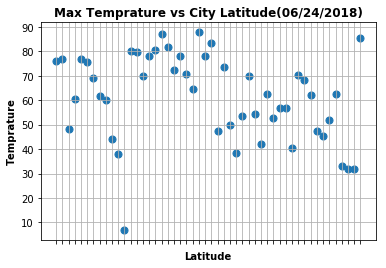

In [17]:
scatter = plt.figure()
ax = scatter.add_subplot(1,1,1)
ax.scatter(x=sample.Lat, y=sample.Temp, s=50)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.grid()
ax.set_xlabel('Latitude',fontweight='bold')
ax.set_ylabel('Temprature',fontweight='bold')
plt.title('Max Temprature vs City Latitude(06/24/2018)',fontweight='bold');
plt.savefig('Temp.png', bbox_inches='tight')

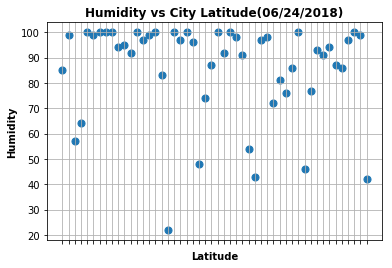

In [18]:
scatter = plt.figure()
ax = scatter.add_subplot(1,1,1)
ax.scatter(x=sample.Lat, y=sample.Humidity, s=50)
ax.grid()
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_xlabel('Latitude',fontweight='bold')
ax.set_ylabel('Humidity',fontweight='bold')
plt.title('Humidity vs City Latitude(06/24/2018)',fontweight='bold');
plt.savefig('Humidity.png', bbox_inches='tight')

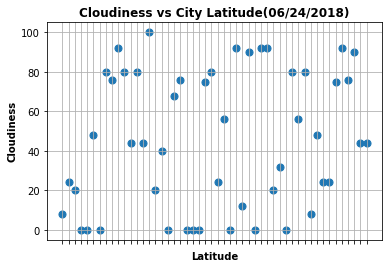

In [19]:
scatter = plt.figure()
ax = scatter.add_subplot(1,1,1)
ax.scatter(x=sample.Lat, y=sample.Cloudiness, s=50)
ax.grid()
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_xlabel('Latitude',fontweight='bold')
ax.set_ylabel('Cloudiness',fontweight='bold')
plt.title('Cloudiness vs City Latitude(06/24/2018)',fontweight='bold');
plt.savefig('Cloudiness.png', bbox_inches='tight')

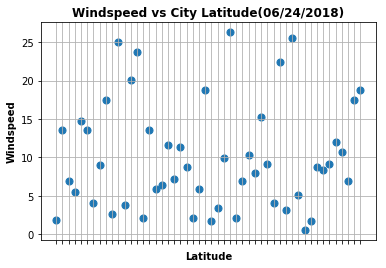

In [20]:
scatter = plt.figure()
ax = scatter.add_subplot(1,1,1)
ax.scatter(x=sample.Lat, y=sample.Windspeed, s=50)
ax.grid()
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_xlabel('Latitude',fontweight='bold')
ax.set_ylabel('Windspeed',fontweight='bold')
plt.title('Windspeed vs City Latitude(06/24/2018)',fontweight='bold');
plt.savefig('Windspeed.png', bbox_inches='tight')